Images in the dataset: 856


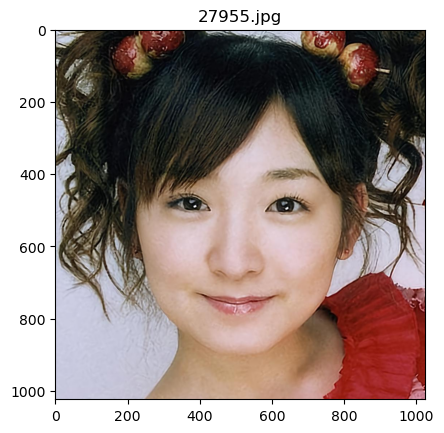

In [1]:
import matplotlib.pyplot as plt
import os
import glob
import random

RANDOM_SEED = 42

dataset_path = "/Users/tilen/school/sb/assignment_03/data/CelebA-HQ-small"

# Get all JPG files from the dataset path
all_images = glob.glob(os.path.join(dataset_path, "*.jpg"))
print(f"Images in the dataset: {len(all_images)}")

# Select random image to plot
random_image = random.sample(all_images, 1)[0]

# Plot the random image with name
img = plt.imread(random_image)
plt.imshow(img)
plt.title(os.path.basename(random_image))
plt.show()


train indices: 475
test indices: 412
images in the dataset: 856
sum of train and test indices: 887
       idx  identity  x_1  y_1  width  height  split
33    1205       160  270  153    605     802   test
34    1205       160  891  537    107     133   test
178   5389       157  190  125    628     850   test
179   5389       157  829  523     60     106   test
193   5842       113  322  224    529     711  train
194   5842       113  197  555     26      35  train
219   6622       199  226  216    575     711   test
220   6622       199  353  933     24      27   test
243   7311       175  281  173    565     747   test
244   7311       175  316  964     27      34   test
247   7401        22  223  154    580     789  train
248   7401        22   64  904     46      51  train
261   7792        59  228  180    608     793  train
262   7792        59  297  945     35      42  train
344  10268        80  244  166    518     748  train
345  10268        80 -103  287    214     255  train


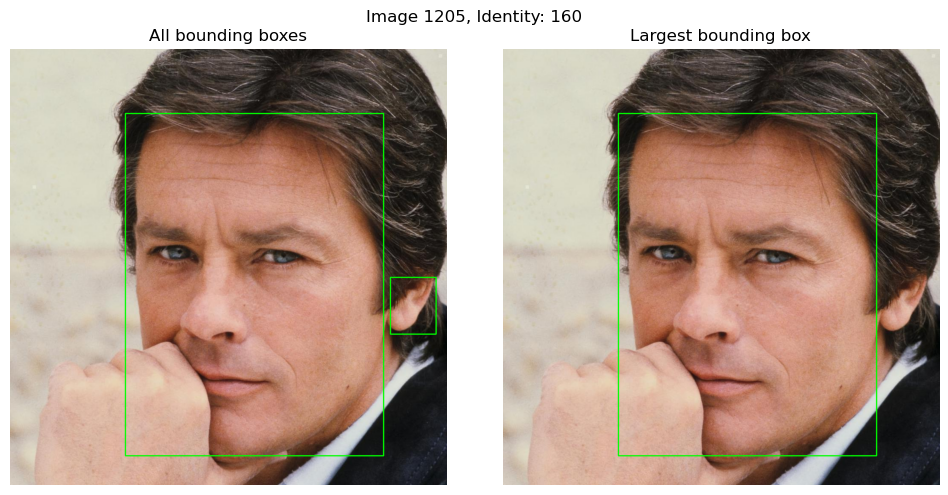

Original DataFrame size: 887
Cleaned DataFrame size: 856
Number of rows removed: 31


In [2]:
import pandas as pd
import cv2

# Read the CSV file
file_path = "/Users/tilen/school/sb/assignment_03/data/CelebA-HQ-small.csv"

df = pd.read_csv(file_path)

# Get train and test indices
train_indices = df[df["split"] == "train"]["idx"].values
test_indices = df[df["split"] == "test"]["idx"].values

# print number of train and test indices
print(f"train indices: {len(train_indices)}")
print(f"test indices: {len(test_indices)}")
print(f"images in the dataset: {len(all_images)}")
print(f"sum of train and test indices: {len(train_indices) + len(test_indices)}")

# Print duplicates in df
print("="*10)
# get all duplicates
duplicates = df[df['idx'].duplicated(keep=False)]
print(duplicates)

# Create a copy of the original DataFrame
df_cleaned = df.copy()

# Keep track of indices to drop
indices_to_drop = []

# Iterate through each duplicate entry
for idx in duplicates['idx'].unique():
    # Get the paths of the images corresponding to the duplicate index
    duplicate_images = df_cleaned[df_cleaned['idx'] == idx]

    # Get the index of the largest bounding box
    largest_bbox_idx = duplicate_images['width'].idxmax()

    # Add all other indices (except the largest) to the drop list
    indices_to_drop.extend(duplicate_images.index[duplicate_images.index != largest_bbox_idx].tolist())

    # Get the path of the image corresponding to the largest bounding box
    img_path = os.path.join(dataset_path, f"{idx}.jpg")
    
    # Create two copies of the image
    img_all = cv2.imread(img_path)
    img_largest = cv2.imread(img_path)
    
    # Draw all bounding boxes on the first image
    for _, row in duplicate_images.iterrows():
        cv2.rectangle(img_all, 
                    (row['x_1'], row['y_1']), 
                    (row['x_1'] + row['width'], row['y_1'] + row['height']), 
                    (0, 255, 0), 2)  # Green for ground truth
    
    # Draw only the largest bounding box on the second image
    largest_bbox = duplicate_images.loc[duplicate_images['width'].idxmax()]
    cv2.rectangle(img_largest,
                (largest_bbox['x_1'], largest_bbox['y_1']), 
                (largest_bbox['x_1'] + largest_bbox['width'], 
                 largest_bbox['y_1'] + largest_bbox['height']), 
                (0, 255, 0), 2)
    
    # Convert both images to RGB
    img_all_rgb = cv2.cvtColor(img_all, cv2.COLOR_BGR2RGB)
    img_largest_rgb = cv2.cvtColor(img_largest, cv2.COLOR_BGR2RGB)
    
    
    # Plot both images only for first duplicate
    if idx == duplicates['idx'].unique()[0]:
        # Create a figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

        ax1.imshow(img_all_rgb)
        ax1.set_title(f"All bounding boxes")
        ax1.axis('off')
        
        ax2.imshow(img_largest_rgb)
        ax2.set_title(f"Largest bounding box")
        ax2.axis('off')
        
        plt.suptitle(f"Image {idx}, Identity: {duplicate_images['identity'].tolist()[0]}")
        plt.tight_layout()
        plt.show()

# Remove the duplicate entries (keeping only the largest bbox)
df_cleaned = df_cleaned.drop(indices_to_drop)

# Save the cleaned DataFrame
output_path = "/Users/tilen/school/sb/assignment_03/data/CelebA-HQ-small_cleaned.csv"
df_cleaned.to_csv(output_path, index=False)

# Print some statistics
print(f"Original DataFrame size: {len(df)}")
print(f"Cleaned DataFrame size: {len(df_cleaned)}")
print(f"Number of rows removed: {len(indices_to_drop)}")

run viola jones face detection on the train images
use intersection over union to evaluate the detection
use grid search to find the best parameters for the detection
visualize some results with the best parameters

Starting grid search for best parameters...


Parameter combinations:   3%|▎         | 1/36 [00:02<01:26,  2.47s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 3, 'min_size': (20, 20)}, Mean IoU: 0.728


Parameter combinations:   6%|▌         | 2/36 [00:04<01:12,  2.14s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 3, 'min_size': (30, 30)}, Mean IoU: 0.695


Parameter combinations:   8%|▊         | 3/36 [00:05<01:01,  1.88s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 3, 'min_size': (40, 40)}, Mean IoU: 0.707


Parameter combinations:  11%|█         | 4/36 [00:08<01:06,  2.07s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 4, 'min_size': (20, 20)}, Mean IoU: 0.729


Parameter combinations:  14%|█▍        | 5/36 [00:10<01:02,  2.01s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 4, 'min_size': (30, 30)}, Mean IoU: 0.701


Parameter combinations:  17%|█▋        | 6/36 [00:11<00:56,  1.87s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 4, 'min_size': (40, 40)}, Mean IoU: 0.714


Parameter combinations:  19%|█▉        | 7/36 [00:14<00:57,  1.99s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 5, 'min_size': (20, 20)}, Mean IoU: 0.711


Parameter combinations:  22%|██▏       | 8/36 [00:15<00:54,  1.94s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 5, 'min_size': (30, 30)}, Mean IoU: 0.708


Parameter combinations:  25%|██▌       | 9/36 [00:17<00:49,  1.84s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 5, 'min_size': (40, 40)}, Mean IoU: 0.702


Parameter combinations:  28%|██▊       | 10/36 [00:19<00:52,  2.00s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 6, 'min_size': (20, 20)}, Mean IoU: 0.702


Parameter combinations:  31%|███       | 11/36 [00:21<00:49,  1.98s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 6, 'min_size': (30, 30)}, Mean IoU: 0.709


Parameter combinations:  33%|███▎      | 12/36 [00:23<00:45,  1.88s/it]

Params: {'scale_factor': 1.1, 'min_neighbors': 6, 'min_size': (40, 40)}, Mean IoU: 0.717


Parameter combinations:  36%|███▌      | 13/36 [00:24<00:40,  1.75s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 3, 'min_size': (20, 20)}, Mean IoU: 0.699


Parameter combinations:  39%|███▉      | 14/36 [00:26<00:34,  1.56s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 3, 'min_size': (30, 30)}, Mean IoU: 0.711


Parameter combinations:  42%|████▏     | 15/36 [00:27<00:29,  1.40s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 3, 'min_size': (40, 40)}, Mean IoU: 0.691


Parameter combinations:  44%|████▍     | 16/36 [00:28<00:28,  1.41s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 4, 'min_size': (20, 20)}, Mean IoU: 0.669


Parameter combinations:  47%|████▋     | 17/36 [00:29<00:25,  1.32s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 4, 'min_size': (30, 30)}, Mean IoU: 0.708


Parameter combinations:  50%|█████     | 18/36 [00:30<00:22,  1.24s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 4, 'min_size': (40, 40)}, Mean IoU: 0.705


Parameter combinations:  53%|█████▎    | 19/36 [00:32<00:21,  1.29s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 5, 'min_size': (20, 20)}, Mean IoU: 0.677


Parameter combinations:  56%|█████▌    | 20/36 [00:33<00:19,  1.25s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 5, 'min_size': (30, 30)}, Mean IoU: 0.700


Parameter combinations:  58%|█████▊    | 21/36 [00:34<00:17,  1.18s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 5, 'min_size': (40, 40)}, Mean IoU: 0.715


Parameter combinations:  61%|██████    | 22/36 [00:35<00:17,  1.26s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 6, 'min_size': (20, 20)}, Mean IoU: 0.652


Parameter combinations:  64%|██████▍   | 23/36 [00:36<00:15,  1.21s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 6, 'min_size': (30, 30)}, Mean IoU: 0.683


Parameter combinations:  67%|██████▋   | 24/36 [00:37<00:13,  1.16s/it]

Params: {'scale_factor': 1.2, 'min_neighbors': 6, 'min_size': (40, 40)}, Mean IoU: 0.684


Parameter combinations:  69%|██████▉   | 25/36 [00:38<00:12,  1.13s/it]

Params: {'scale_factor': 1.3, 'min_neighbors': 3, 'min_size': (20, 20)}, Mean IoU: 0.703


Parameter combinations:  72%|███████▏  | 26/36 [00:39<00:10,  1.07s/it]

Params: {'scale_factor': 1.3, 'min_neighbors': 3, 'min_size': (30, 30)}, Mean IoU: 0.727


Parameter combinations:  75%|███████▌  | 27/36 [00:40<00:08,  1.02it/s]

Params: {'scale_factor': 1.3, 'min_neighbors': 3, 'min_size': (40, 40)}, Mean IoU: 0.680


Parameter combinations:  78%|███████▊  | 28/36 [00:41<00:08,  1.01s/it]

Params: {'scale_factor': 1.3, 'min_neighbors': 4, 'min_size': (20, 20)}, Mean IoU: 0.705


Parameter combinations:  81%|████████  | 29/36 [00:42<00:06,  1.03it/s]

Params: {'scale_factor': 1.3, 'min_neighbors': 4, 'min_size': (30, 30)}, Mean IoU: 0.656


Parameter combinations:  83%|████████▎ | 30/36 [00:43<00:05,  1.09it/s]

Params: {'scale_factor': 1.3, 'min_neighbors': 4, 'min_size': (40, 40)}, Mean IoU: 0.686


Parameter combinations:  86%|████████▌ | 31/36 [00:44<00:04,  1.05it/s]

Params: {'scale_factor': 1.3, 'min_neighbors': 5, 'min_size': (20, 20)}, Mean IoU: 0.637


Parameter combinations:  89%|████████▉ | 32/36 [00:45<00:03,  1.06it/s]

Params: {'scale_factor': 1.3, 'min_neighbors': 5, 'min_size': (30, 30)}, Mean IoU: 0.688


Parameter combinations:  92%|█████████▏| 33/36 [00:46<00:02,  1.11it/s]

Params: {'scale_factor': 1.3, 'min_neighbors': 5, 'min_size': (40, 40)}, Mean IoU: 0.676


Parameter combinations:  94%|█████████▍| 34/36 [00:47<00:01,  1.05it/s]

Params: {'scale_factor': 1.3, 'min_neighbors': 6, 'min_size': (20, 20)}, Mean IoU: 0.679


Parameter combinations:  97%|█████████▋| 35/36 [00:48<00:00,  1.06it/s]

Params: {'scale_factor': 1.3, 'min_neighbors': 6, 'min_size': (30, 30)}, Mean IoU: 0.633


Parameter combinations: 100%|██████████| 36/36 [00:48<00:00,  1.36s/it]

Params: {'scale_factor': 1.3, 'min_neighbors': 6, 'min_size': (40, 40)}, Mean IoU: 0.658

Best parameters found:
Scale Factor: 1.1
Min Neighbors: 4
Min Size: (20, 20)
Best IoU: 0.729


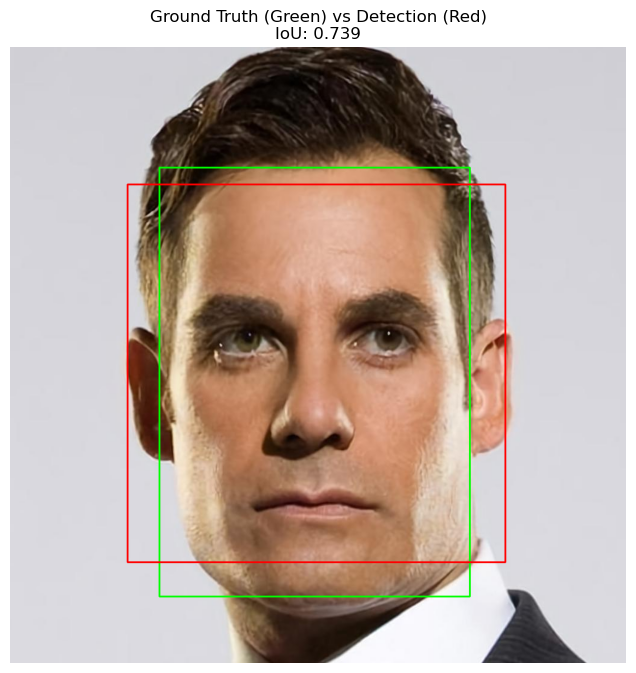

In [3]:
import cv2
import numpy as np
from tqdm import tqdm

def calculate_iou(box1, box2):
    """Calculate IoU between two bounding boxes"""
    # Convert boxes to [x1, y1, x2, y2] format
    box1 = [box1[0], box1[1], box1[0] + box1[2], box1[1] + box1[3]]
    box2 = [box2[0], box2[1], box2[0] + box2[2], box2[1] + box2[3]]
    
    # Calculate intersection
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    
    # Calculate union
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - intersection
    
    return intersection / union if union > 0 else 0

def detect_faces(image_path, face_cascade, params):
    """Detect faces in an image using Viola-Jones"""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=params['scale_factor'],
        minNeighbors=params['min_neighbors'],
        minSize=params['min_size']
    )
    
    return faces

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Parameters to try
param_grid = {
    'scale_factor': [1.1, 1.2, 1.3],
    'min_neighbors': [3, 4, 5, 6],
    'min_size': [(20, 20), (30, 30), (40, 40)]
}

# Get train indices
train_indices = df_cleaned[df_cleaned['split'] == 'train']['idx'].values

# Get training images
train_images = [os.path.join(dataset_path, f"{idx}.jpg") for idx in train_indices]
train_annotations = df_cleaned[df_cleaned['idx'].isin(train_indices)]

# Function to evaluate parameters
def evaluate_params(params, n_samples=100):
    """Evaluate detection performance for given parameters"""
    # Sample subset of training images for faster evaluation
    sample_indices = np.random.choice(len(train_images), n_samples, replace=False)
    ious = []
    
    for idx in sample_indices:
        img_path = train_images[idx]
        img_name = os.path.basename(img_path)
        img_idx = int(img_name.split('.')[0])
        
        # Get ground truth
        gt = train_annotations[train_annotations['idx'] == img_idx].iloc[0]
        gt_box = [gt['x_1'], gt['y_1'], gt['width'], gt['height']]
        
        # Detect faces
        detected_faces = detect_faces(img_path, face_cascade, params)
        
        if len(detected_faces) > 0:
            # Calculate IoU with each detected face and take the maximum
            max_iou = max(calculate_iou(gt_box, detected_face) 
                         for detected_face in detected_faces)
            ious.append(max_iou)
        else:
            ious.append(0)
    
    return np.mean(ious)

# Grid search for best parameters
best_iou = 0
best_params = None

total_combinations = (len(param_grid['scale_factor']) * 
                     len(param_grid['min_neighbors']) * 
                     len(param_grid['min_size']))

print("Starting grid search for best parameters...")
with tqdm(total=total_combinations, desc="Parameter combinations") as pbar:
    for scale_factor in param_grid['scale_factor']:
        for min_neighbors in param_grid['min_neighbors']:
            for min_size in param_grid['min_size']:
                params = {
                    'scale_factor': scale_factor,
                    'min_neighbors': min_neighbors,
                    'min_size': min_size
                }
                
                mean_iou = evaluate_params(params)
                print(f"Params: {params}, Mean IoU: {mean_iou:.3f}")
                
                if mean_iou > best_iou:
                    best_iou = mean_iou
                    best_params = params
                
                pbar.update(1)

print(f"\nBest parameters found:")
print(f"Scale Factor: {best_params['scale_factor']}")
print(f"Min Neighbors: {best_params['min_neighbors']}")
print(f"Min Size: {best_params['min_size']}")
print(f"Best IoU: {best_iou:.3f}")

# Visualize some results with best parameters
test_images = random.sample(train_images, 1)
for img_path in test_images:
    img = cv2.imread(img_path)
    img_name = os.path.basename(img_path)
    img_idx = int(img_name.split('.')[0])
    
    # Get ground truth
    gt = train_annotations[train_annotations['idx'] == img_idx].iloc[0]
    
    # Draw ground truth (green)
    cv2.rectangle(img, 
                 (gt['x_1'], gt['y_1']), 
                 (gt['x_1'] + gt['width'], gt['y_1'] + gt['height']), 
                 (0, 255, 0), 2)
    
    # Detect and draw faces (red)
    faces = detect_faces(img_path, face_cascade, best_params)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    # Display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.title(f"Ground Truth (Green) vs Detection (Red)\nIoU: {calculate_iou([gt['x_1'], gt['y_1'], gt['width'], gt['height']], faces[0]) if len(faces) > 0 else 0:.3f}")
    plt.axis('off')
    plt.show()

# Evaluation on test set


Viola-Jones Detection Performance:
--------------------------------------------------

Metrics at IoU threshold=0.5:


Calculating metrics:  73%|███████▎  | 289/395 [00:04<00:01, 65.79it/s]

Iou: 0.013092384289138854, IoU threshold: 0.5


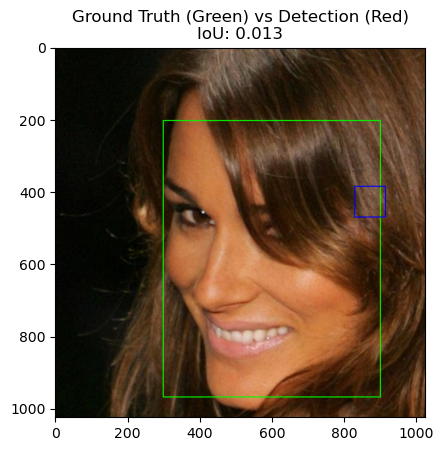

Calculating metrics:  79%|███████▊  | 311/395 [00:04<00:01, 61.76it/s]

Iou: 0.4644957142683947, IoU threshold: 0.5


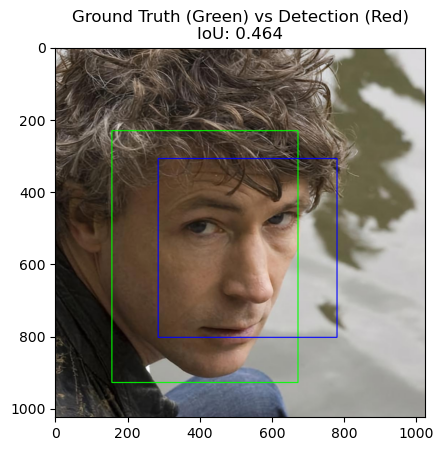

Calculating metrics:  88%|████████▊ | 346/395 [00:05<00:00, 59.87it/s]

Iou: 0.4939973798939072, IoU threshold: 0.5


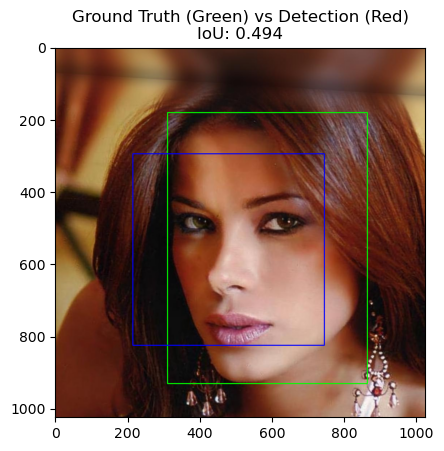

Calculating metrics: 100%|██████████| 395/395 [00:06<00:00, 61.96it/s]

Mean IoU: 0.696
Precision: 0.919
Recall: 0.957
F1 Score: 0.937
True Positives: 375
False Positives: 33
False Negatives: 17
Classification Accuracy: 0.919


In [16]:
# dict to store face detections with the best iou
face_detections = {}

# (I) Evaluate detection performance separately and report IoU metrics.
def calculate_detection_metrics(face_cascade, params, test_images, test_annotations, iou_threshold=0.5):
    """Calculate comprehensive detection metrics"""
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    ious = []
    
    for img_path in tqdm(test_images, desc="Calculating metrics"):
        img_name = os.path.basename(img_path)
        img_idx = int(img_name.split('.')[0])
        
        # Get ground truth
        gt = test_annotations[test_annotations['idx'] == img_idx].iloc[0]
        gt_box = [gt['x_1'], gt['y_1'], gt['width'], gt['height']]
        
        # Detect faces
        detected_faces = detect_faces(img_path, face_cascade, params)
        
        if len(detected_faces) > 0:
            # Calculate IoU with each detected face and find the best one
            best_iou = 0
            best_face = None
            for face in detected_faces:
                iou = calculate_iou(gt_box, face)
                if iou > best_iou:
                    best_iou = iou
                    best_face = face
            
            ious.append(best_iou)
            # Store the best detection
            face_detections[img_idx] = best_face

            # Count true positives and false positives
            if best_iou >= iou_threshold:
                true_positives += 1
            else:
                if best_face is None:
                    continue    
                false_positives += 1

                print(f"Iou: {best_iou}, IoU threshold: {iou_threshold}")
                # plot the image with both the ground truth and the detection
                img = cv2.imread(img_path)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                cv2.rectangle(img_rgb, (gt['x_1'], gt['y_1']), (gt['x_1'] + gt['width'], gt['y_1'] + gt['height']), (0, 255, 0), 2)
                cv2.rectangle(img_rgb, (best_face[0], best_face[1]), (best_face[0] + best_face[2], best_face[1] + best_face[3]), (0, 0, 255), 2)
                plt.title(f"Ground Truth (Green) vs Detection (Red)\nIoU: {best_iou:.3f}")
                plt.imshow(img_rgb)
                plt.show()
                
            # Additional false positives from multiple detections
            false_positives += len(detected_faces) - 1
        else:
            false_negatives += 1
            ious.append(0)
    
    # Calculate metrics
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    mean_iou = np.mean(ious)
    
    return {
        'mean_iou': mean_iou,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives,
        'classification_accuracy': true_positives / (true_positives + false_positives)
    }

# Get test set
test_indices = df_cleaned[df_cleaned['split'] == 'test']['idx'].values
test_images = [os.path.join(dataset_path, f"{idx}.jpg") for idx in test_indices]
test_annotations = df_cleaned[df_cleaned['idx'].isin(test_indices)]

# Evaluate at different IoU thresholds
print("\nViola-Jones Detection Performance:")
print("-" * 50)
iou_threshold = 0.5
print(f"\nMetrics at IoU threshold={iou_threshold}:")
metrics = calculate_detection_metrics(
    face_cascade, 
    best_params, 
    test_images, 
    test_annotations, 
    iou_threshold=iou_threshold
)

print(f"Mean IoU: {metrics['mean_iou']:.3f}")
print(f"Precision: {metrics['precision']:.3f}")
print(f"Recall: {metrics['recall']:.3f}")
print(f"F1 Score: {metrics['f1_score']:.3f}")
print(f"True Positives: {metrics['true_positives']}")
print(f"False Positives: {metrics['false_positives']}")
print(f"False Negatives: {metrics['false_negatives']}")
print(f"Classification Accuracy: {metrics['classification_accuracy']:.3f}")

Evaluate recognition performance. Plot Cumulative Match Characteristic (CMC) curves and
report Rank-1 and Rank-5 recognition accuracies:

(II) Whole images using each feature extractor

In [17]:
from feature_extractors import chi_square_distance

def calculate_cmc(gallery_features, gallery_ids, probe_features, probe_ids, max_rank=10):
    """Calculate CMC curve using chi-square distance"""
    gallery_ids = np.array(gallery_ids)
    probe_ids = np.array(probe_ids)

    # Calculate pairwise chi-square distances
    distances = np.zeros((len(probe_features), len(gallery_features)))
    for i, probe in enumerate(probe_features):
        for j, gallery in enumerate(gallery_features):
            distances[i,j] = chi_square_distance(probe, gallery)
    
    sorted_indices = np.argsort(distances, axis=1)
    
    n_probes = len(probe_ids)
    cmc = np.zeros(max_rank)
    
    print("\nFirst probe example:")
    print(f"Probe ID: {probe_ids[0]}")
    print(f"Top 5 matched gallery IDs: {gallery_ids[sorted_indices[0][:5]]}")
    print(f"Corresponding distances: {distances[0][sorted_indices[0][:5]]}")
    
    for i, probe_id in enumerate(probe_ids):
        gallery_rankings = gallery_ids[sorted_indices[i]]
        correct_matches = np.where(gallery_rankings == probe_id)[0]
        if len(correct_matches) > 0:
            first_match = correct_matches[0]
            cmc[first_match:] += 1
    
    cmc = cmc / n_probes
    return cmc

In [18]:
import numpy as np

# Get train set and split into gallery/probe
train_data = df_cleaned[df_cleaned['split'] == 'train'].copy()  # Make a copy
gallery_indices = []
probe_indices = []

# Reset index to make sure we're working with clean indices
train_data = train_data.reset_index(drop=True)

print("Sample of train_data:")
print(train_data[['idx', 'identity']].head(10))

# After splitting
print("\nFirst few splits:")
for i in range(3):  # First 3 identities
    identity = train_data['identity'].unique()[i]
    identity_df = train_data[train_data['identity'] == identity]
    print(f"\nIdentity {identity}:")
    print("Gallery:", identity_df.index[:len(identity_df)//2].tolist())
    print("Probe:", identity_df.index[len(identity_df)//2:].tolist())
    print("Gallery IDs:", train_data.loc[identity_df.index[:len(identity_df)//2], 'identity'].values)
    print("Probe IDs:", train_data.loc[identity_df.index[len(identity_df)//2:], 'identity'].values)

for identity in train_data['identity'].unique():
    # Get all images for this identity
    identity_df = train_data[train_data['identity'] == identity]
    
    # Split images for this identity
    n_gallery = len(identity_df) // 2
    gallery_indices.extend(identity_df.index[:n_gallery])
    probe_indices.extend(identity_df.index[n_gallery:])

# Create paths and get IDs
gallery_paths = [os.path.join(dataset_path, f"{train_data.loc[idx, 'idx']}.jpg") for idx in gallery_indices]
probe_paths = [os.path.join(dataset_path, f"{train_data.loc[idx, 'idx']}.jpg") for idx in probe_indices]
gallery_ids = train_data.loc[gallery_indices, 'identity'].values
probe_ids = train_data.loc[probe_indices, 'identity'].values

# Verify split
print("\nVerification:")
print(f"First gallery identity: {train_data.loc[gallery_indices[0], 'identity']}")
print(f"First probe identity: {train_data.loc[probe_indices[0], 'identity']}")# Also check if IDs match between gallery and probe
print("\nFirst few gallery IDs:", gallery_ids[:5])
print("First few probe IDs:", probe_ids[:5])

print("\nSample ID checks:")
sample_identity = train_data['identity'].unique()[0]
print(f"Sample identity: {sample_identity}")
print("Gallery images for this identity:", 
      train_data[train_data['identity'] == sample_identity]['idx'].values[:n_gallery])
print("Probe images for this identity:", 
      train_data[train_data['identity'] == sample_identity]['idx'].values[n_gallery:])


print(f"Number of unique identities: {len(train_data['identity'].unique())}")
print(f"Number of gallery images: {len(gallery_indices)}")
print(f"Number of probe images: {len(probe_indices)}")
print(f"Number of unique gallery IDs: {len(np.unique(gallery_ids))}")
print(f"Number of unique probe IDs: {len(np.unique(probe_ids))}")

Sample of train_data:
   idx  identity
0  112       114
1  145       114
2  181        85
3  209        27
4  212        27
5  290       113
6  310        94
7  358        38
8  418        47
9  605        65

First few splits:

Identity 114:
Gallery: [0, 1, 54, 62, 63, 80, 99]
Probe: [129, 139, 168, 205, 209, 261, 360, 443]
Gallery IDs: [114 114 114 114 114 114 114]
Probe IDs: [114 114 114 114 114 114 114 114]

Identity 85:
Gallery: [2, 130, 140, 142, 201, 218]
Probe: [266, 300, 320, 352, 401, 448]
Gallery IDs: [85 85 85 85 85 85]
Probe IDs: [85 85 85 85 85 85]

Identity 27:
Gallery: [3, 4, 61]
Probe: [149, 368, 408]
Gallery IDs: [27 27 27]
Probe IDs: [27 27 27]

Verification:
First gallery identity: 114
First probe identity: 114

First few gallery IDs: [114 114 114 114 114]
First few probe IDs: [114 114 114 114 114]

Sample ID checks:
Sample identity: 114
Gallery images for this identity: [112 145]
Probe images for this identity: [ 3113  3728  3812  4577  6297  7755  8526  9988 12392

In [19]:
###### LBP grid search ######
from feature_extractors import extract_lbp_features
# Grid search parameters
param_pairs = [
    {'radius': 1, 'n_points': 8},
    {'radius': 2, 'n_points': 16},
    {'radius': 3, 'n_points': 24}
]

# Grid search
best_rank1_lbp = 0
best_params_lbp = None

for params in param_pairs:
    radius = params['radius']
    n_points = params['n_points']
    print(f"\nTesting radius={radius}, n_points={n_points}")
    
    # Extract features with current parameters
    gallery_features = [extract_lbp_features(path, radius=radius, n_points=n_points) 
                        for path in tqdm(gallery_paths, desc="Gallery")]
    probe_features = [extract_lbp_features(path, radius=radius, n_points=n_points) 
                        for path in tqdm(probe_paths, desc="Probe")]
    
    # Calculate CMC
    cmc = calculate_cmc(np.array(gallery_features), gallery_ids, 
                        np.array(probe_features), probe_ids)
    rank1_accuracy = cmc[0]
    
    print(f"Rank-1 Accuracy: {rank1_accuracy*100:.2f}%")
    
    if rank1_accuracy > best_rank1_lbp:
        best_rank1_lbp = rank1_accuracy
        best_params_lbp = {'radius': radius, 'n_points': n_points}

print(f"\nBest parameters: {best_params_lbp}")
print(f"Best Rank-1 Accuracy")


Testing radius=1, n_points=8


Probe: 100%|██████████| 246/246 [00:39<00:00,  6.23it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114  34  34 114  87]
Corresponding distances: [2.29611297 2.62986196 3.03026095 3.246397   3.42740358]
Rank-1 Accuracy: 16.67%

Testing radius=2, n_points=16


Probe: 100%|██████████| 246/246 [00:41<00:00,  6.00it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114  34  34 114  87]
Corresponding distances: [2.29611297 2.62986196 3.03026095 3.246397   3.42740358]
Rank-1 Accuracy: 16.67%

Testing radius=3, n_points=24


Probe: 100%|██████████| 246/246 [00:41<00:00,  5.98it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114  34  34 114  87]
Corresponding distances: [2.29611297 2.62986196 3.03026095 3.246397   3.42740358]
Rank-1 Accuracy: 16.67%

Best parameters: {'radius': 1, 'n_points': 8}
Best Rank-1 Accuracy


In [20]:
### HOG grid search ###
from feature_extractors import extract_hog_features

# Grid search parameters
param_grid = {
    'orientations': [8, 9],
    'pixels_per_cell': [(8, 8), (16, 16)],
    'cells_per_block': [(2, 2), (3, 3)]
}

# Grid search
best_rank1_hog = 0
best_params_hog = None

for orientations in param_grid['orientations']:
    for pixels_per_cell in param_grid['pixels_per_cell']:
        for cells_per_block in param_grid['cells_per_block']:
            params = {
                'orientations': orientations,
                'pixels_per_cell': pixels_per_cell,
                'cells_per_block': cells_per_block
            }
            
            print(f"\nTesting parameters: {params}")
            
            # Extract features
            gallery_features = [extract_hog_features(path, params) 
                              for path in tqdm(gallery_paths, desc="Gallery")]
            probe_features = [extract_hog_features(path, params) 
                            for path in tqdm(probe_paths, desc="Probe")]
            
            # Calculate CMC
            cmc = calculate_cmc(np.array(gallery_features), gallery_ids, 
                              np.array(probe_features), probe_ids)
            
            rank1_accuracy = cmc[0]
            print(f"Rank-1 Accuracy: {rank1_accuracy*100:.2f}%")
            
            if rank1_accuracy > best_rank1_hog:
                best_rank1_hog = rank1_accuracy
                best_params_hog = params

print(f"\nBest parameters: {best_params_hog}")
print(f"Best Rank-1 Accuracy: {best_rank1_hog*100:.2f}%")


Testing parameters: {'orientations': 8, 'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2)}


Probe: 100%|██████████| 246/246 [00:29<00:00,  8.26it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114  34 114  34  38]
Corresponding distances: [14006.73473808 14365.63501438 14442.86167212 14663.82853372
 14783.13903636]
Rank-1 Accuracy: 33.74%

Testing parameters: {'orientations': 8, 'pixels_per_cell': (8, 8), 'cells_per_block': (3, 3)}


Probe: 100%|██████████| 246/246 [00:30<00:00,  8.13it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114  34 114  34  38]
Corresponding distances: [23848.75726729 24606.06683776 24672.75793668 25005.29157274
 25120.59535241]
Rank-1 Accuracy: 36.18%

Testing parameters: {'orientations': 8, 'pixels_per_cell': (16, 16), 'cells_per_block': (2, 2)}


Probe: 100%|██████████| 246/246 [00:14<00:00, 17.17it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114 114  34  85 114]
Corresponding distances: [2200.60632328 2264.69721339 2281.99279748 2435.87633346 2453.41924995]
Rank-1 Accuracy: 33.74%

Testing parameters: {'orientations': 8, 'pixels_per_cell': (16, 16), 'cells_per_block': (3, 3)}


Probe: 100%|██████████| 246/246 [00:13<00:00, 18.08it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114 114  34  85 114]
Corresponding distances: [4011.91866536 4147.13845756 4203.33107293 4380.72966648 4460.31379905]
Rank-1 Accuracy: 38.21%

Testing parameters: {'orientations': 9, 'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2)}


Probe: 100%|██████████| 246/246 [00:29<00:00,  8.34it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114  34 114  34  38]
Corresponding distances: [15845.34850649 16152.08516054 16213.24739312 16489.32533107
 16502.4935908 ]
Rank-1 Accuracy: 31.30%

Testing parameters: {'orientations': 9, 'pixels_per_cell': (8, 8), 'cells_per_block': (3, 3)}


Probe: 100%|██████████| 246/246 [00:30<00:00,  8.05it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114  34 114  38  34]
Corresponding distances: [26496.16617072 27193.41419411 27240.71410921 27616.27658843
 27654.96796371]
Rank-1 Accuracy: 36.99%

Testing parameters: {'orientations': 9, 'pixels_per_cell': (16, 16), 'cells_per_block': (2, 2)}


Probe: 100%|██████████| 246/246 [00:14<00:00, 17.06it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114 114  34  85 114]
Corresponding distances: [2493.05127569 2552.74720771 2571.08466516 2726.3635949  2755.68197854]
Rank-1 Accuracy: 33.33%

Testing parameters: {'orientations': 9, 'pixels_per_cell': (16, 16), 'cells_per_block': (3, 3)}


Probe: 100%|██████████| 246/246 [00:13<00:00, 17.98it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [114 114  34  85 114]
Corresponding distances: [4437.74972591 4567.8500696  4625.31159472 4810.91545158 4895.38808532]
Rank-1 Accuracy: 38.62%

Best parameters: {'orientations': 9, 'pixels_per_cell': (16, 16), 'cells_per_block': (3, 3)}
Best Rank-1 Accuracy: 38.62%


In [21]:
# dense sift grid search
from feature_extractors import extract_dense_sift
from sklearn.cluster import KMeans


# Grid search parameters
param_grid = {
    'step_size': [4, 8],           # Grid spacing
    'patch_size': [16, 32],        # Size of local patches
}

# Grid search
best_rank1_dsift = 0
best_params_dsift = None

for step_size in param_grid['step_size']:
    for patch_size in param_grid['patch_size']:
        params = {
            'step_size': step_size,
            'patch_size': patch_size
        }
        
        print(f"\nTesting parameters: {params}")
        
        # Extract features
        gallery_features = [extract_dense_sift(path, params) 
                          for path in tqdm(gallery_paths, desc="Gallery")]
        probe_features = [extract_dense_sift(path, params) 
                        for path in tqdm(probe_paths, desc="Probe")]
        
        # Convert variable-length descriptors to fixed-length features using BoW
        n_clusters = 256  # vocabulary size
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        
        # Fit on gallery features
        all_descriptors = np.vstack([desc for desc in gallery_features if desc is not None])
        kmeans.fit(all_descriptors)
        
        # Transform to histograms
        def to_histogram(descriptors):
            if descriptors is None:
                return np.zeros(n_clusters)
            words = kmeans.predict(descriptors)
            return np.bincount(words, minlength=n_clusters)
        
        gallery_histograms = np.array([to_histogram(desc) for desc in gallery_features])
        probe_histograms = np.array([to_histogram(desc) for desc in probe_features])
        
        # Calculate CMC
        cmc = calculate_cmc(gallery_histograms, gallery_ids, 
                          probe_histograms, probe_ids)
        
        rank1_accuracy = cmc[0]
        print(f"Rank-1 Accuracy: {rank1_accuracy*100:.2f}%")
        
        if rank1_accuracy > best_rank1_dsift:
            best_rank1_dsift = rank1_accuracy
            best_params_dsift = params

print(f"\nBest parameters: {best_params_dsift}")
print(f"Best Rank-1 Accuracy: {best_rank1_dsift*100:.2f}%")


Testing parameters: {'step_size': 4, 'patch_size': 16}


Probe: 100%|██████████| 246/246 [00:02<00:00, 101.62it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [ 32  34  14  87 114]
Corresponding distances: [258.03991897 340.93151846 360.80715647 370.559161   377.00066984]
Rank-1 Accuracy: 19.92%

Testing parameters: {'step_size': 4, 'patch_size': 32}


Probe: 100%|██████████| 246/246 [00:05<00:00, 41.31it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [ 32  32 114  94  94]
Corresponding distances: [137.97714667 164.06060049 168.30785142 172.40699611 173.68528956]
Rank-1 Accuracy: 16.26%

Testing parameters: {'step_size': 8, 'patch_size': 16}


Probe: 100%|██████████| 246/246 [00:00<00:00, 261.28it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [32 14 94 32 87]
Corresponding distances: [69.15114558 78.48465032 88.43057498 89.48317238 97.39034854]
Rank-1 Accuracy: 19.92%

Testing parameters: {'step_size': 8, 'patch_size': 32}


Probe: 100%|██████████| 246/246 [00:02<00:00, 110.85it/s]



First probe example:
Probe ID: 114
Top 5 matched gallery IDs: [ 32  14 114  94  85]
Corresponding distances: [37.91284271 43.07861028 45.80930736 46.16580478 55.09861641]
Rank-1 Accuracy: 18.29%

Best parameters: {'step_size': 4, 'patch_size': 16}
Best Rank-1 Accuracy: 19.92%


In [23]:
# for plotting the cmc and creating gallery and probe from test set
test_data = df_cleaned[df_cleaned['split'] == 'test'].copy()  # Make a copy
gallery_indices_test = []
probe_indices_test = []

print("\nTest Set Statistics:")
print("-" * 50)
print(f"Total number of test images: {len(test_data)}")
print(f"Number of unique identities: {len(test_data['identity'].unique())}")


# Reset index to make sure we're working with clean indices
test_data = test_data.reset_index(drop=True)

# After splitting
for identity in test_data['identity'].unique():
    # Get all images for this identity
    identity_df = test_data[test_data['identity'] == identity]
    
    # Split images for this identity
    n_gallery = len(identity_df) // 2
    gallery_indices_test.extend(identity_df.index[:n_gallery])
    probe_indices_test.extend(identity_df.index[n_gallery:])

# Create paths and get IDs
gallery_paths_test = [os.path.join(dataset_path, f"{test_data.loc[idx, 'idx']}.jpg") for idx in gallery_indices_test]
probe_paths_test = [os.path.join(dataset_path, f"{test_data.loc[idx, 'idx']}.jpg") for idx in probe_indices_test]
gallery_ids_test = test_data.loc[gallery_indices_test, 'identity'].values
probe_ids_test = test_data.loc[probe_indices_test, 'identity'].values

print(f"\nGallery size: {len(gallery_paths_test)}")
print(f"Probe size: {len(probe_paths_test)}")
print(f"Number of unique gallery IDs: {len(np.unique(gallery_ids_test))}")
print(f"Number of unique probe IDs: {len(np.unique(probe_ids_test))}")




Test Set Statistics:
--------------------------------------------------
Total number of test images: 395
Number of unique identities: 50

Gallery size: 181
Probe size: 214
Number of unique gallery IDs: 50
Number of unique probe IDs: 50


In [24]:
# =================LBP no viola jones===============
print("\nExtracting LBP features no viola jones...")
gallery_features_lbp = [extract_lbp_features(path, **best_params_lbp) 
                   for path in tqdm(gallery_paths_test, desc="Gallery")]
probe_features_lbp = [extract_lbp_features(path, **best_params_lbp) 
                 for path in tqdm(probe_paths_test, desc="Probe")]

max_rank = len(gallery_features_lbp)  # Use full gallery size
print(f"Max rank: {max_rank}")

cmc_lbp = calculate_cmc(np.array(gallery_features_lbp), gallery_ids_test, 
                   np.array(probe_features_lbp), probe_ids_test,
                   max_rank=max_rank)


Extracting LBP features no viola jones...


Probe: 100%|██████████| 214/214 [00:37<00:00,  5.71it/s]


Max rank: 181

First probe example:
Probe ID: 138
Top 5 matched gallery IDs: [207 180 226 121 215]
Corresponding distances: [10.34187783 11.36199656 12.20855563 12.50153504 12.68128649]


In [25]:
# hog no viola jones
print(best_params_hog)
print("\nExtracting HOG features no viola jones...")
gallery_features_hog = [extract_hog_features(path, best_params_hog) 
                   for path in tqdm(gallery_paths_test, desc="Gallery")]
probe_features_hog = [extract_hog_features(path, best_params_hog) 
                 for path in tqdm(probe_paths_test, desc="Probe")]

max_rank = len(gallery_features_hog)  # Use full gallery size
print(f"Max rank: {max_rank}")

cmc_hog = calculate_cmc(np.array(gallery_features_hog), gallery_ids_test, 
                   np.array(probe_features_hog), probe_ids_test,
                   max_rank=max_rank)

{'orientations': 9, 'pixels_per_cell': (16, 16), 'cells_per_block': (3, 3)}

Extracting HOG features no viola jones...


Probe: 100%|██████████| 214/214 [00:12<00:00, 17.51it/s]


Max rank: 181

First probe example:
Probe ID: 138
Top 5 matched gallery IDs: [155 129 138 226 138]
Corresponding distances: [6372.50741469 6448.57591731 6636.71154978 6732.96492283 6776.985018  ]


In [26]:
# dsift no viola jones

best_params_dsift = {'step_size': 4, 'patch_size': 16}
print("\nExtracting DSIFT features no viola jones...")
gallery_features_dsift = [extract_dense_sift(path, best_params_dsift) 
                   for path in tqdm(gallery_paths_test, desc="Gallery")]
probe_features_dsift = [extract_dense_sift(path, best_params_dsift) 
                 for path in tqdm(probe_paths_test, desc="Probe")]

max_rank = len(gallery_features_dsift)  # Use full gallery size
print(f"Max rank: {max_rank}")

cmc_dsift = calculate_cmc(np.array(gallery_features_dsift), gallery_ids_test, 
                   np.array(probe_features_dsift), probe_ids_test,
                   max_rank=max_rank)


Extracting DSIFT features no viola jones...


Probe: 100%|██████████| 214/214 [00:02<00:00, 98.95it/s] 


Max rank: 181

First probe example:
Probe ID: 138
Top 5 matched gallery IDs: [129 206 139 158 206]
Corresponding distances: [481630.78125 536363.0625  545041.9375  559685.5625  559704.5625 ]


In [27]:
# lbp viola jones
from tqdm.auto import tqdm  # Add this import at the top

print("\nExtracting LBP features with Viola Jones...")

# Extract features from detected face regions
gallery_features_lbp_vj = []
gallery_ids_detected = []  # Keep track of IDs for detected faces only
probe_features_lbp_vj = []
probe_ids_detected = []    # Keep track of IDs for detected faces only

# Process gallery images
for path, identity in tqdm(zip(gallery_paths_test, gallery_ids_test), desc="Gallery"):
    img_idx = int(os.path.basename(path).split('.')[0])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if img_idx in face_detections and face_detections[img_idx] is not None:
        x, y, w, h = face_detections[img_idx]
        face_img = img[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (128, 128))
        
        # Extract LBP features
        features = extract_lbp_features(face_img, **best_params_lbp)
        gallery_features_lbp_vj.append(features)
        gallery_ids_detected.append(identity)  # Store ID only for detected faces

# Process probe images
for path, identity in tqdm(zip(probe_paths_test, probe_ids_test), desc="Probe"):
    img_idx = int(os.path.basename(path).split('.')[0])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if img_idx in face_detections and face_detections[img_idx] is not None:
        x, y, w, h = face_detections[img_idx]
        face_img = img[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (128, 128))
        
        # Extract LBP features
        features = extract_lbp_features(face_img, **best_params_lbp)
        probe_features_lbp_vj.append(features)
        probe_ids_detected.append(identity)  # Store ID only for detected faces

# Convert to numpy arrays
gallery_features_lbp_vj = np.array(gallery_features_lbp_vj)
probe_features_lbp_vj = np.array(probe_features_lbp_vj)
gallery_ids_detected = np.array(gallery_ids_detected)
probe_ids_detected = np.array(probe_ids_detected)

# Calculate CMC curve using only detected faces
max_rank = len(gallery_features_lbp_vj)
cmc_lbp_vj = calculate_cmc(gallery_features_lbp_vj, gallery_ids_detected, 
                          probe_features_lbp_vj, probe_ids_detected,
                          max_rank=max_rank)


Extracting LBP features with Viola Jones...


Gallery: 181it [00:02, 89.73it/s]
Probe: 214it [00:02, 93.06it/s]



First probe example:
Probe ID: 138
Top 5 matched gallery IDs: [138 205 139 171 215]
Corresponding distances: [ 8.90766432  9.78302295 10.00075049 10.09621839 10.10486121]


In [28]:
# hog viola jones
from feature_extractors import extract_hog_features
from skimage.feature import hog

print("\nExtracting HOG features with Viola Jones...")

# Extract features from detected face regions
gallery_features_hog_vj = []
gallery_ids_detected = []  # Keep track of IDs for detected faces only
probe_features_hog_vj = []
probe_ids_detected = []    # Keep track of IDs for detected faces only

# Best parameters from previous grid search
best_params_hog = {'orientations': 9, 'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2)}  # hardcoded but taken from grid search

# Process gallery images
for path, identity in tqdm(zip(gallery_paths_test, gallery_ids_test), desc="Gallery"):
    img_idx = int(os.path.basename(path).split('.')[0])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if img_idx in face_detections and face_detections[img_idx] is not None:
        x, y, w, h = face_detections[img_idx]
        face_img = img[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (128, 128))
        
        # Extract HOG features
        features = extract_hog_features(face_img, best_params_hog)
        gallery_features_hog_vj.append(features)
        gallery_ids_detected.append(identity)

# Process probe images
for path, identity in tqdm(zip(probe_paths_test, probe_ids_test), desc="Probe"):
    img_idx = int(os.path.basename(path).split('.')[0])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if img_idx in face_detections and face_detections[img_idx] is not None:
        x, y, w, h = face_detections[img_idx]
        face_img = img[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (128, 128))
        
        # Extract HOG features
        features = extract_hog_features(face_img, best_params_hog)
        probe_features_hog_vj.append(features)
        probe_ids_detected.append(identity)

# Convert to numpy arrays
gallery_features_hog_vj = np.array(gallery_features_hog_vj)
probe_features_hog_vj = np.array(probe_features_hog_vj)
gallery_ids_detected = np.array(gallery_ids_detected)
probe_ids_detected = np.array(probe_ids_detected)

# Calculate CMC curve using only detected faces
max_rank = len(gallery_features_hog_vj)
cmc_hog_vj = calculate_cmc(gallery_features_hog_vj, gallery_ids_detected, 
                          probe_features_hog_vj, probe_ids_detected,
                          max_rank=max_rank)


Extracting HOG features with Viola Jones...


Gallery: 181it [00:00, 316.14it/s]
Probe: 214it [00:00, 346.06it/s]



First probe example:
Probe ID: 138
Top 5 matched gallery IDs: [139 205 205 138 171]
Corresponding distances: [163.80973438 172.8991147  174.84405717 175.21644462 176.25850794]


In [29]:
from sklearn.cluster import KMeans  # Add this import
from feature_extractors import extract_dense_sift


print("\nExtracting Dense SIFT features with Viola Jones...")

# Extract features from detected face regions
gallery_features_dsift_vj = []
gallery_ids_detected = []  # Keep track of IDs for detected faces only
probe_features_dsift_vj = []
probe_ids_detected = []    # Keep track of IDs for detected faces only

# Best parameters from previous grid search
best_params_dsift = {'step_size': 4, 'patch_size': 16}  # adjust if your best params were different

# Process gallery images
for path, identity in tqdm(zip(gallery_paths_test, gallery_ids_test), desc="Gallery"):
    img_idx = int(os.path.basename(path).split('.')[0])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if img_idx in face_detections and face_detections[img_idx] is not None:
        x, y, w, h = face_detections[img_idx]
        face_img = img[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (128, 128))
        
        # Extract Dense SIFT features
        features = extract_dense_sift(face_img, best_params_dsift)
        gallery_features_dsift_vj.append(features)
        gallery_ids_detected.append(identity)

# Process probe images
for path, identity in tqdm(zip(probe_paths_test, probe_ids_test), desc="Probe"):
    img_idx = int(os.path.basename(path).split('.')[0])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if img_idx in face_detections and face_detections[img_idx] is not None:
        x, y, w, h = face_detections[img_idx]
        face_img = img[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (128, 128))
        
        # Extract Dense SIFT features
        features = extract_dense_sift(face_img, best_params_dsift)
        probe_features_dsift_vj.append(features)
        probe_ids_detected.append(identity)

# Convert variable-length descriptors to fixed-length features using BoW
n_clusters = 256  # vocabulary size
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit on gallery features
all_descriptors = np.vstack([desc for desc in gallery_features_dsift_vj if desc is not None])
kmeans.fit(all_descriptors)

# Transform to histograms
def to_histogram(descriptors):
    if descriptors is None:
        return np.zeros(n_clusters)
    words = kmeans.predict(descriptors)
    return np.bincount(words, minlength=n_clusters)

gallery_histograms = np.array([to_histogram(desc) for desc in gallery_features_dsift_vj])
probe_histograms = np.array([to_histogram(desc) for desc in probe_features_dsift_vj])

# Calculate CMC curve using only detected faces
max_rank = len(gallery_histograms)
cmc_dsift_vj = calculate_cmc(gallery_histograms, gallery_ids_detected, 
                            probe_histograms, probe_ids_detected,
                            max_rank=max_rank)



Extracting Dense SIFT features with Viola Jones...


Gallery: 181it [00:01, 93.45it/s]
Probe: 214it [00:01, 109.70it/s]



First probe example:
Probe ID: 138
Top 5 matched gallery IDs: [212 130 205 121 174]
Corresponding distances: [191.97709024 223.63799106 264.11889278 337.00937632 340.37431945]


len(cmc_lbp):  173
len(cmc_hog):  173
len(cmc_dsift):  173
len(cmc_lbp_vj):  179
len(cmc_hog_vj):  179
len(cmc_dsift_vj):  179


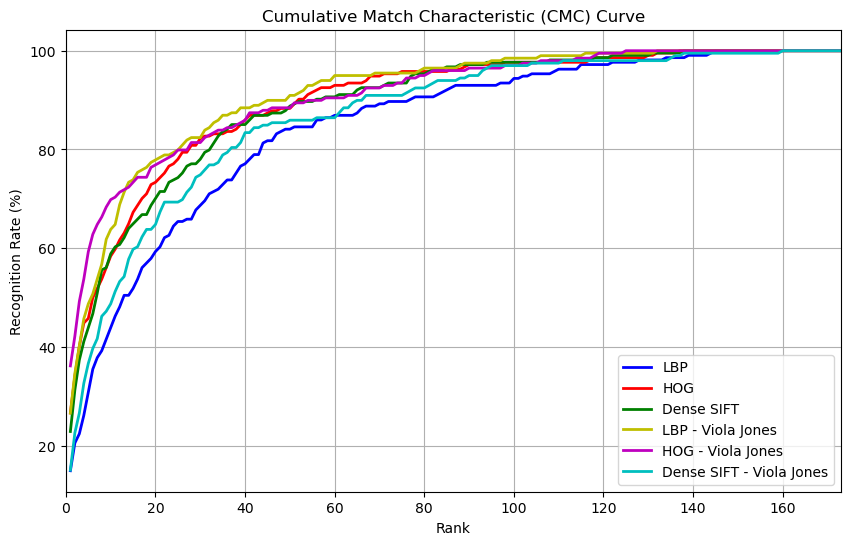

Results without Viola-Jones:
LBP     - Rank 1: 14.95%, Rank 5: 30.84%
HOG     - Rank 1: 26.64%, Rank 5: 45.79%
D-SIFT  - Rank 1: 22.90%, Rank 5: 43.93%

Results with Viola-Jones:
LBP+VJ  - Rank 1: 26.63%, Rank 5: 48.74%
HOG+VJ  - Rank 1: 36.18%, Rank 5: 59.30%
D-SIFT+VJ - Rank 1: 15.08%, Rank 5: 36.68%


In [36]:
def plot_cmc(cmc, label="LBP", color='b-', new_figure=True):
    if new_figure:
        plt.figure(figsize=(10, 6))
        plt.grid(True)
        plt.xlabel('Rank')
        plt.ylabel('Recognition Rate (%)')
        plt.title("Cumulative Match Characteristic (CMC) Curve")
        plt.xlim(0, len(cmc))
        # plt.ylim(0, 101)
    
    # Plot the CMC curve
    plt.plot(range(1, len(cmc)+ 1), cmc * 100, color, linewidth=2, label=label)
    plt.legend()


cmc_lbp = cmc_lbp[:-2]
cmc_hog = cmc_hog[:-2]
cmc_dsift = cmc_dsift[:-2]

# Plot all curves
plot_cmc(cmc_lbp, label="LBP", color='b-', new_figure=True)
plot_cmc(cmc_hog, label="HOG", color='r-', new_figure=False)
plot_cmc(cmc_dsift, label="Dense SIFT", color='g-', new_figure=False)
plot_cmc(cmc_lbp_vj, label="LBP - Viola Jones", color='y-', new_figure=False)
plot_cmc(cmc_hog_vj, label="HOG - Viola Jones", color='m-', new_figure=False)
plot_cmc(cmc_dsift_vj, label="Dense SIFT - Viola Jones", color='c-', new_figure=False)

print("len(cmc_lbp): ", len(cmc_lbp))
print("len(cmc_hog): ", len(cmc_hog))
print("len(cmc_dsift): ", len(cmc_dsift))
print("len(cmc_lbp_vj): ", len(cmc_lbp_vj))
print("len(cmc_hog_vj): ", len(cmc_hog_vj))
print("len(cmc_dsift_vj): ", len(cmc_dsift_vj))

import pickle

# Save the CMCs to a file
cmc_data = {
    "cmc_lbp": cmc_lbp,
    "cmc_hog": cmc_hog,
    "cmc_dsift": cmc_dsift,
    "cmc_lbp_vj": cmc_lbp_vj,
    "cmc_hog_vj": cmc_hog_vj,
    "cmc_dsift_vj": cmc_dsift_vj
}

with open("cmc_data.pkl", "wb") as f:
    pickle.dump(cmc_data, f)


# save the figure
plt.savefig("cmc_curves.png")

# Show the final figure with all curves
plt.show()

# print rank1 and rank5
# with names of the methods
print("Results without Viola-Jones:")
print(f"LBP     - Rank 1: {cmc_lbp[0]*100:.2f}%, Rank 5: {cmc_lbp[4]*100:.2f}%")
print(f"HOG     - Rank 1: {cmc_hog[0]*100:.2f}%, Rank 5: {cmc_hog[4]*100:.2f}%")
print(f"D-SIFT  - Rank 1: {cmc_dsift[0]*100:.2f}%, Rank 5: {cmc_dsift[4]*100:.2f}%")

print("\nResults with Viola-Jones:")
print(f"LBP+VJ  - Rank 1: {cmc_lbp_vj[0]*100:.2f}%, Rank 5: {cmc_lbp_vj[4]*100:.2f}%")
print(f"HOG+VJ  - Rank 1: {cmc_hog_vj[0]*100:.2f}%, Rank 5: {cmc_hog_vj[4]*100:.2f}%")
print(f"D-SIFT+VJ - Rank 1: {cmc_dsift_vj[0]*100:.2f}%, Rank 5: {cmc_dsift_vj[4]*100:.2f}%")